In [ ]:
# Personalized Learning Model for Neurodivergent Students 
# Curriculum Optimization

# Carly Carroll

In [2]:
##### LOAD LIBRARIES #####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##### LOAD CSV FILE #####

engagement_profile = pd.read_csv("engagement_profile_clean.csv")

# add binary target for curriculum adaptation logic
engagement_profile['final_result_binary'] = engagement_profile['final_result'].map({
    'Pass': 1, 'Fail': 0, 'Withdrawn': 0
})

In [4]:
##### DEFINE ENGAGEMENT PROFILE TYPES #####

engagement_profile['engagement_type'] = 'Low Clicker'
engagement_profile.loc[engagement_profile['sum_click'] > 100, 'engagement_type'] = 'Moderate Clicker'
engagement_profile.loc[engagement_profile['sum_click'] > 300, 'engagement_type'] = 'High Clicker'

In [5]:
##### ASSIGN CURRICULUM PATHWAYS #####

curriculum_paths = {
    'High Clicker': ['Core Modules', 'Advanced Modules', 'Capstone Project'],
    'Moderate Clicker': ['Core Modules', 'Skill Builders', 'Capstone Project'],
    'Low Clicker': ['Core Modules', 'Remedial Support', 'Skill Builders', 'Capstone Project']
}

engagement_profile['curriculum_path'] = engagement_profile['engagement_type'].map(curriculum_paths)

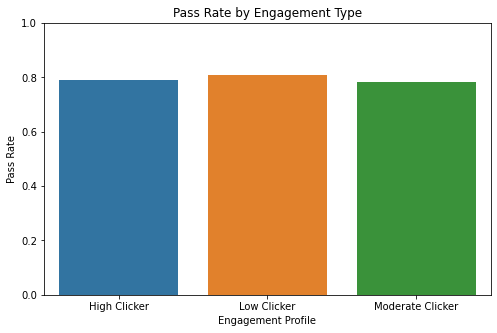

,engagement_type,count,pass_rate
0,High Clicker,2595,0.789210
1,Low Clicker,73853229,0.809557
2,Moderate Clicker,54586,0.783791


In [6]:
##### SUMMARIZE CURRICULUM PATH EFFECTIVENESS #####

grouped = (
    engagement_profile
    .groupby('engagement_type')['final_result_binary']
    .agg(['count', 'mean'])
    .rename(columns={'mean': 'pass_rate'})
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='engagement_type', y='pass_rate')
plt.title("Pass Rate by Engagement Type")
plt.ylim(0, 1)
plt.ylabel("Pass Rate")
plt.xlabel("Engagement Profile")
plt.show()

grouped

In [7]:
##### MOCK CURRICULUM SEQUENCE PER STUDENT #####

# pre-convert curriculum lists into joined strings
curriculum_paths_str = {
    'High Clicker': 'Core Modules → Advanced Modules → Capstone Project',
    'Moderate Clicker': 'Core Modules → Skill Builders → Capstone Project',
    'Low Clicker': 'Core Modules → Remedial Support → Skill Builders → Capstone Project'
}

# vectorized mapping
engagement_profile['curriculum_sequence'] = engagement_profile['engagement_type'].map(curriculum_paths_str)

# show examples
engagement_profile[['id_student', 'engagement_type', 'curriculum_sequence']].head()

,id_student,engagement_type,curriculum_sequence
0,11391,Low Clicker,Core Modules → Remedial Support → Skill Builde...
1,11391,Low Clicker,Core Modules → Remedial Support → Skill Builde...
2,11391,Low Clicker,Core Modules → Remedial Support → Skill Builde...
3,11391,Low Clicker,Core Modules → Remedial Support → Skill Builde...
4,11391,Low Clicker,Core Modules → Remedial Support → Skill Builde...
